<a href="https://colab.research.google.com/github/vanshuwjoshi/End-To-End-ML/blob/main/03_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Import the MNIST dataset
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',
                     as_frame=False ## this does not return images but the arrays
                     )
## mnist

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
mnist.keys() ## data is stored in a kind of key-value system

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Here data is X and target is y

In [3]:
X, y = mnist.data, mnist.target

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
X.shape

(70000, 784)

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
y.shape

(70000,)

Trying to view a digit

In [8]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [9]:
X[0].shape

(784,)

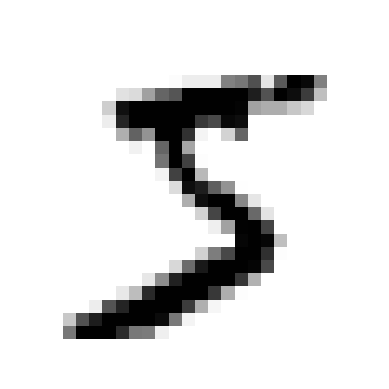

In [10]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
  image = image_data.reshape(28,28) ## reshape the image to 28x28 matrix
  plt.imshow(image,cmap='binary') ## binary means 0 is white and 255 is black
  plt.axis("off") ## remove the axis labels

plot_digit(X[0])
plt.show()

Looks like a 5. We can check the "target" or y  in our case.

In [11]:
y[0]

'5'

Split the data into training and test set. However, in this set, first 60000 are training and next 10000 are test.

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier

In [ ]:
## 5 or not-5
y_train_5 = (y_train == '5') ## Return array of True (if 5) or False (if non-5)
y_test_5 = (y_test == '5')

In [ ]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
## Testing on X[0]
sgd_clf.predict([X[0]])

array([ True])

## Performance Measure

### 1. Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

## 3-fold Cross Validation
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

This is a High Accuracy - 95%.

However, this need not be the best model as there might be overfitting or some other kind of issue.

In [ ]:
## Creating a dummy classifier - Classify all images to the most frequent class
## (non-5 in this case)

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

DummyClassifier()

In [ ]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

Even with a Dummy Classifier we get a 90% accuracy. This is because majority of the images are non-5, therefore, there is a high chance of getting a non-5 image predicted correctly.

Conclusion - Accuracy is not a good measure for Classifiers, especially for dealing with skewed datasets (when one class is much more frequent than the others).

#### Implementing Cross-Validation without sklearn

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3) ## 3 folds stratified samples

for train_index, test_index in skfolds.split(X_train, y_train_5):
  '''
  Since the data is split into 3 folds, .split function take 2 folds at a
  time and use it as training data and the remaining fold is used as test data.
  train_index and test_index are two arrays with indexes representing training
  and test data.
  '''
  ## Cloing the classifier
  clone_clf = clone(sgd_clf)

  ## Training data
  X_train_fold = X_train[train_index]
  y_train_fold = y_train_5[train_index]

  ## Testing data
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  ## Training the model & making predictions
  clone_clf.fit(X_train_fold, y_train_fold)
  y_pred = clone_clf.predict(X_test_fold)

  ## Calculate and print accuracy
  n_correct = sum(y_test_fold == y_pred)
  print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


### Confusion Matrix

In [ ]:
## Making predictions using CV
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
## Creating Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

- TN = 53892
- FP = 687
- FN = 1891
- TP = 3530

### Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("Precision Score = ", precision_score(y_train_5, y_train_pred))
print("Recall Score = ", recall_score(y_train_5, y_train_pred))

Precision Score =  0.8370879772350012
Recall Score =  0.6511713705958311


When compared to accuracy, we can see that these scores are very low. Especially the Recall, as out of all the 5's only 65% are correctly predicted.

In [ ]:
## F1 Score = Harmonic mean of Precision and Recall
from sklearn.metrics import f1_score
print("F1 Score = ", f1_score(y_train_5, y_train_pred))

F1 Score =  0.7325171197343846


#### Precision and Recall Tradeoff

In [ ]:
## Calculate score of each instance
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function") ##return decision scores
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [ ]:
## Get Precision and Recall of all possible Thresholds
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
precisions

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

In [ ]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

precision_recall_curve() adds a last precision of 1 and a last recall of 0. Therefore, we need to remove these to plot our values.

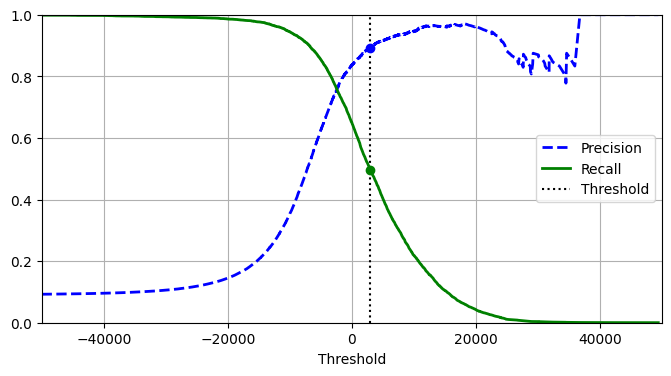

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
## Showing a threshold of 3000
plt.vlines(3000, 0, 1.0, "k", "dotted", label="Threshold")

## Get first index for which threshold >= 3000
idx = (thresholds >= 3000).argmax()
## Plotting the precision and recall for that index
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

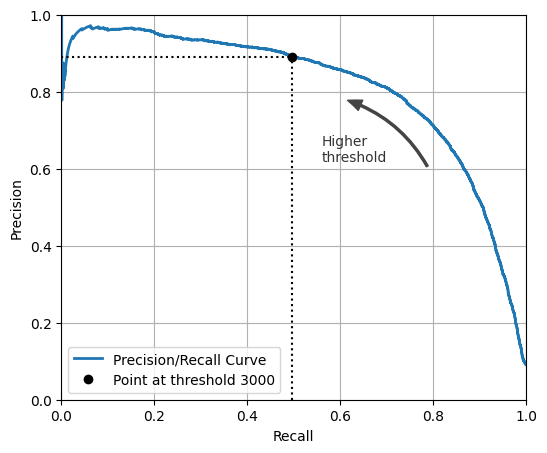

In [ ]:
## Plotting Precision vs Recall
import matplotlib.patches as patches

plt.figure(figsize=(6,5))
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall Curve")

## Plotting points for threshold >= 3000
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.,recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko", label="Point at threshold 3000")

## Add the arrow
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

In [ ]:
## Searching for lowest threshold to get 90% Precision
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [ ]:
## Making predictions based on the above threshold
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

We achieve 90% Precision but at 47% Recall.

### The ROC Curve

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [ ]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99937705, 0.99937705,
       1.        ])

In [ ]:
tpr

array([0.00000000e+00, 1.84467810e-04, 9.22339052e-04, ...,
       9.99815532e-01, 1.00000000e+00, 1.00000000e+00])

In [ ]:
thresholds

array([             inf,   49441.43765905,   36801.60697028, ...,
       -105763.22240074, -106527.45300471, -146348.56726174])

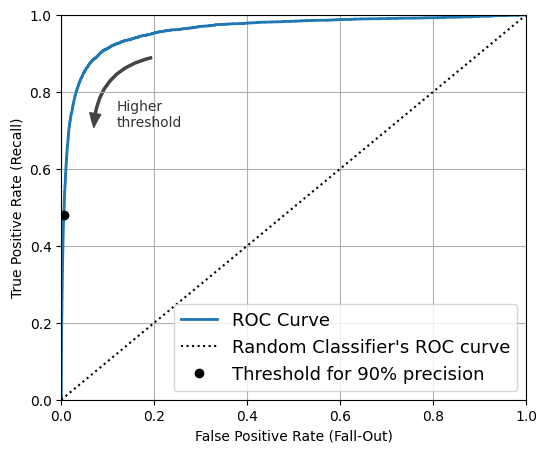

In [ ]:
## To find the point for 90% precision, we find index of desired threshold
## Thresholds are listed in decreasing order so we find the closest threshold
## to the threshold_for_90_precision using <=
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
plt.plot([0,1], [0,1], 'k:', label="Random Classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

We want model closest to Top-Left corner (TPR=1 and FPR=0).

In [ ]:
### ROC AUC (Area Under the Curve)
from sklearn.metrics import roc_auc_score

## Calculating score for our SGD classification model
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

### Implementing Second Model (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

To train our Random Forest Classifier, we can again use `cross_val_predict()` with `cv=3`. However, for Random Forest we cannot use `decision_function()` to calculate scores of each instance. Therefore, we have to use `predict_proba()` which returns class probabilites for each instance.



In [ ]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

For each instance, `predict_proba()` calculate probability for each each class (here we have 2 classes). For example, for first instance the model gives 89% probability of postive class and for second instance it is just 1%.

Therefore, we can just use the probability of positive class as a score for Precision/Recall curve and ROC curve.

In [ ]:
## Getting just the second column (probability of positive class)
y_scores_forest = y_probas_forest[:,1]
y_scores_forest[:2]

array([0.89, 0.01])

In [ ]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest
)

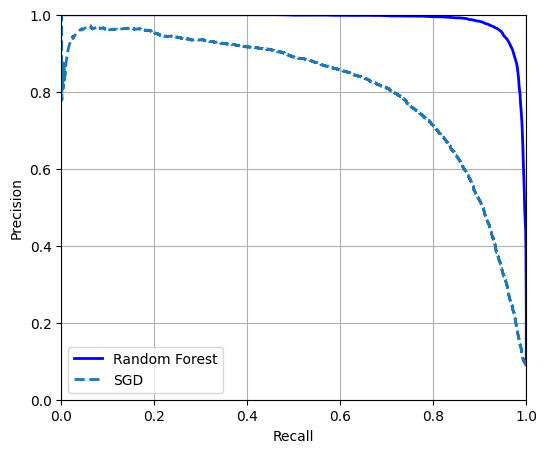

In [ ]:
plt.figure(figsize=(6, 5))

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

We can observe that Random Forest does so much better (more at Top-Right Corner).

In [ ]:
## F1 score
y_train_pred_forest = y_probas_forest[:,1] >= 0.5 ## positive proba >= 50%
print("F1 Score for random forest = ", f1_score(y_train_5, y_train_pred_forest))
print("F1 Score for SGD = ", f1_score(y_train_5, y_train_pred))

F1 Score for random forest =  0.9274509803921569
F1 Score for SGD =  0.7325171197343846


In [ ]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

In [ ]:
## ROC AUC score
print("ROC AUC Score for random forest = ", roc_auc_score(y_train_5,y_scores_forest))
print("ROC AUC Score for SGD = ", roc_auc_score(y_train_5, y_scores))

ROC AUC Score for random forest =  0.9983436731328145
ROC AUC Score for SGD =  0.9604938554008616


F1 Score and ROC AUC score is also much better for Random Forest.

However, we don't need to observe ROC curve as we already know positive class is rare in our dataset. Therefore, ROC curve is inefficient in this case.

# Multiclass Classification

## One-vs-One
SVC algorithm automatically selects OvO way to use the binary classification algorithm to do the multiclass classification.

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_clf = SVC(random_state=42)
## We are doing multiclass, therefore we use y_train
svm_clf.fit(X_train[:2000],y_train[0:2000])
## We train on the first 2000 images (to save time)

SVC(random_state=42)

In [ ]:
svm_clf.predict([X[0]])

array(['5'], dtype=object)

There are 10 classes therefore, the model makes 45 classifiers (as it automatically takes OvO way).

We can use `decision_function()` to get 10 scores (one for each class) the classifier compares to pick the maximum score.


In [ ]:
svm_clf.decision_function([X[0]]).round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

As we can see the highest score is at index 5, which is the class '5' the model predicts. However, we can use `.classes_` to check all the classes of the data (ordered by value).

In [ ]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

## Forcing Classifier to use another method

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000],y_train[:2000])
## This will have 10 classifiers to compare with (one for each class)

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.predict([X[0]])

array(['5'], dtype='<U1')

## One-vs-Rest or One-vs-All

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train[:2000],y_train[:2000])

NameError: name 'sgd' is not defined

In [ ]:
sgd_clf.predict([X[0]])

array(['3'], dtype='<U1')

Incorrect prediction.

We can look at the 10 scores it gives to each class for this prediciton using `decision_function()`.

In [ ]:
sgd_clf.decision_function([X[0]]).round(2)

array([[-31893.03, -34419.69,  -9530.64,   1823.73, -22320.15,  -1385.8 ,
        -26188.91, -16147.51,  -4604.35, -12050.77]])

This depicts that the model is confused as there are many negative scores with class 3 highest. However, we can look at the accuracy of the model using `cross_val_score()` (as there are roughly same number of images for each class the `accuracy` metric is fine).

In [ ]:
## cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

This will generate 85% accuracy which is very good. However, if we `StandardScaler()` our input we can get 89% accuracy.

In [ ]:
## from sklearn.preprocessing import StandardScaler
## scaler = StandardScaler()
## X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
## cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

# Error Analysis

In [13]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [16]:
import matplotlib.pyplot as plt

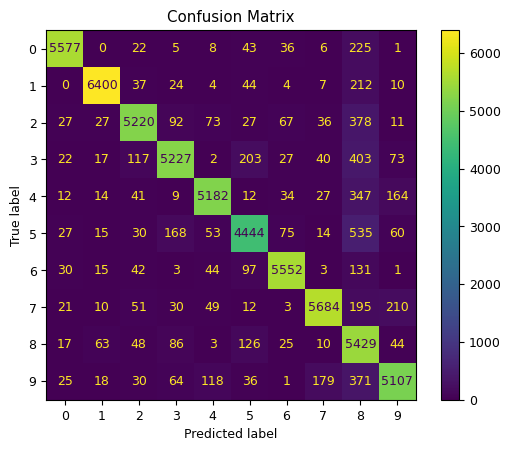

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title("Confusion Matrix")
plt.show()

The diagonal shows number of correct predictions.

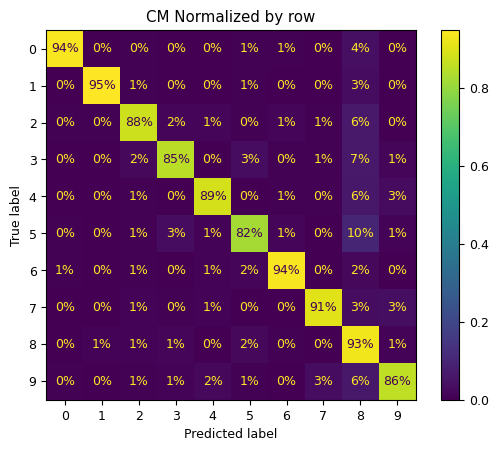

In [19]:
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.title("CM Normalized by row")
plt.show()

We can observe that 82% of 5s are correctly predicted and 10% are misclassified as 8.

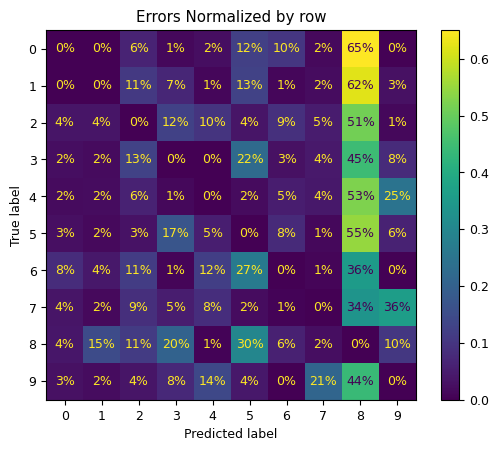

In [21]:
sample_weight = (y_train_pred != y_train) ## giving 0 weight to correct preds
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight = sample_weight,
                                        normalize="true", values_format=".0%")
plt.title("Errors Normalized by row")
plt.show()

- Diagonals are 0's
- Interpretation: row 7 and column 9 = 36%. This 36% means that out of all the 7's that are incorrectly predicted, 36% of them are misclassified as 9's.
- There are a lot of false 8's (65% of incorrectly classified 0's are predicted 8 and so on).
- Here each row will sum to 100%.

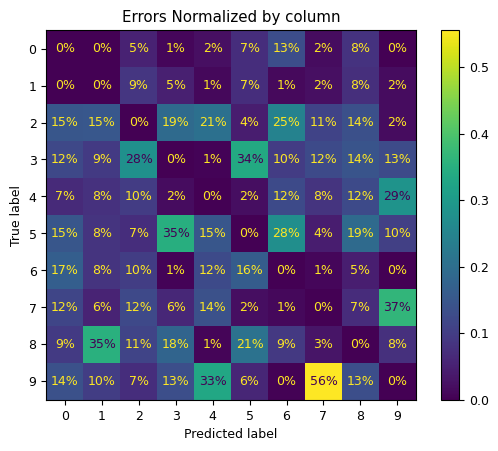

In [22]:
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight = sample_weight,
                                        normalize="pred", values_format=".0%")
plt.title("Errors Normalized by column")
plt.show()

- Interpretation: row 9 and column 7 = 56%. This means that 56% of misclassified 7's are actually 9.
- Here sum of column = 100%.

## Individual errors

In [23]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

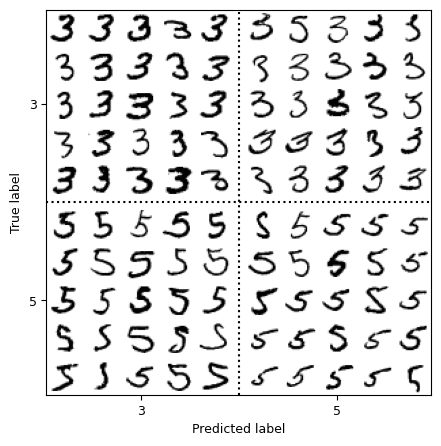

In [25]:
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()